# Incomplete trolley run dipole correction

### Alec Tewsley-Booth, *for Team Purcell*

Run 3997 has a systematic error where the trolley barcode analysis failed over 0.5 deg of the ring. Each analyzer has to treat this issue separately, leading to different analysis choices that propagate into the unblinded difference.

This notebook compares the uncorrected vs corrected Purcell analysis for this effect, and concludes that the effect only generates an approximately 0.15 Hz (2 ppb) difference in the maximum difference, and time averaged difference of less than 0.1 Hz (<1 ppb) for the full 60 hour data set.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.optimize

from datetime import datetime
import pytz

import gm2
import trfp
import helper_function_candidates as helper
import plotting_functions as plt2

Welcome to JupyROOT 6.12/04


In [2]:
# import all the fixed probe runs
# fp_moment_df = helper.import_fp_moment_runs('60hr_fixed_probe_runs.h5', range(3959, 3961))
fp_moment_df = helper.import_fp_moment_runs('60hr_fixed_probe_runs.h5', range(3959, 3995))

Appending fixed probe runs.
Appending run 3994.                                    
Done appending fixed probe runs.


In [3]:
# import all trolley runs (keep CW run for baselines)
tr_moment_df_1, tr_single_runs_df_1 = helper.import_tr_moment_runs('60hr_trolley_runs_1.h5',
                                                                   range(3956, 3959),
                                                                   specific_runs=[3956],
                                                                   corrected=True)

tr_moment_df_2, tr_single_runs_df_2 = helper.import_tr_moment_runs('60hr_trolley_runs_2.h5',
                                                                   range(3995,3999),
                                                                   specific_runs=[3997, 3998],
                                                                   corrected=True)

tr_fixed_run_df = tr_single_runs_df_2[3997].iloc[:-20].append(tr_single_runs_df_2[3998].iloc[:17])
tr_fixed_run_df_corr = trfp.remove_trolley_effect(tr_fixed_run_df)

tr_baseline_1, fp_baseline_1, baseline_time_1, summed_azimuth_1, summed_pts_1 = helper.trolley_run_station_average(tr_single_runs_df_1[3956])
tr_baseline_2, fp_baseline_2, baseline_time_2, summed_azimuth_2, summed_pts_2 = helper.trolley_run_station_average(tr_single_runs_df_2[3997])

# Generate sync parameters based on corrected trolley run
tr_baseline_3, fp_baseline_3, baseline_time_3, summed_azimuth_3, summed_pts_3 = helper.trolley_run_station_average(tr_fixed_run_df_corr)

Appending corrected trolley runs.
Appending run 3956.
Finished removing trolley images from 4382 events.                                                            
Appending run 3957.
Finished removing trolley images from 2977 events.                                                            
Appending run 3958.
Finished removing trolley images from 539 events.              

Done appending corrected trolley runs.
Appending corrected trolley runs.
Appending run 3995.
Finished removing trolley images from 365 events.        
Appending run 3996.
Finished removing trolley images from 921 events.                         
Appending run 3997.
Finished removing trolley images from 4359 events.                                                            
Appending run 3998.
Finished removing trolley images from 2853 events.                                                            

Done appending corrected trolley runs.
Finished removing trolley images from 4356 events.                     

## The missed points

The following plot shows the missed section of azimuth from the end of the barcode analysis of run 3997. The orange points are taken from the beginning of run 3998 to fill in the missing section.

261.83500000000004
263.47
266.41


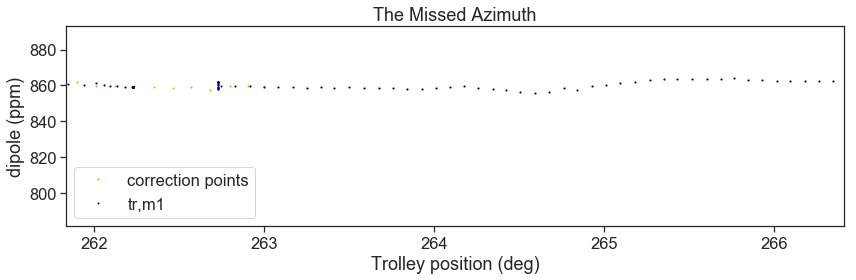

In [32]:
print trfp.STATION_BARCODE_EDGES[55]
print trfp.STATION_BARCODE_PHI[55]
print trfp.STATION_BARCODE_EDGES[56]



fig, ax = plt.subplots(1,1)

plt.plot(tr_fixed_run_df_corr['tr_phi'], tr_fixed_run_df_corr['tr,m1']/61.79, '.', markersize=2, color='orange', label='correction points')
plt.plot(tr_single_runs_df_2[3997]['tr_phi'], tr_single_runs_df_2[3997]['tr,m1']/61.79, '.', markersize=2, color='navy')
ax.legend()
ax.set_xlim(261.835,266.41)

plt2.plt_set_labels(ax, 'Trolley position (deg)', 'dipole (ppm)', 'The Missed Azimuth')

fig.set_size_inches(12,4)
fig.tight_layout()

In [4]:
# VTMs for uncorrected data set
print "Calculating fixed probe runs VTMs."
vtm_df = helper.vtm_calc(fp_moment_df,
             baseline_time_1, baseline_time_2,
             tr_baseline_1, tr_baseline_2,
             fp_baseline_1, fp_baseline_2)

print "Calculating first trolley runs VTMs."
vtm_tr1_df = helper.vtm_calc(tr_moment_df_1,
             baseline_time_1, baseline_time_2,
             tr_baseline_1, tr_baseline_2,
             fp_baseline_1, fp_baseline_2)

print "Calculating second trolley runs VTMs."
vtm_tr2_df = helper.vtm_calc(tr_moment_df_2,
             baseline_time_1, baseline_time_2,
             tr_baseline_1, tr_baseline_2,
             fp_baseline_1, fp_baseline_2)

print "Concatenating dataframes."
vtm_full_df = vtm_tr1_df.append(vtm_df, sort=False).append(vtm_tr2_df, sort=False)

print "Done."

# VTMs for corrected data set
print "Calculating fixed probe runs VTMs."
vtm_df_2 = helper.vtm_calc(fp_moment_df,
             baseline_time_1, baseline_time_3,
             tr_baseline_1, tr_baseline_3,
             fp_baseline_1, fp_baseline_3)

print "Calculating first trolley runs VTMs."
vtm_tr1_df_2 = helper.vtm_calc(tr_moment_df_1,
             baseline_time_1, baseline_time_3,
             tr_baseline_1, tr_baseline_3,
             fp_baseline_1, fp_baseline_3)

print "Calculating second trolley runs VTMs."
vtm_tr2_df_2 = helper.vtm_calc(tr_moment_df_2,
             baseline_time_1, baseline_time_3,
             tr_baseline_1, tr_baseline_3,
             fp_baseline_1, fp_baseline_3)

print "Concatenating dataframes."
vtm_full_df_2 = vtm_tr1_df_2.append(vtm_df_2, sort=False).append(vtm_tr2_df_2, sort=False)

print "Done."

Calculating fixed probe runs VTMs.
Calculating first trolley runs VTMs.
Calculating second trolley runs VTMs.
Concatenating dataframes.
Done.
Calculating fixed probe runs VTMs.
Calculating first trolley runs VTMs.
Calculating second trolley runs VTMs.
Concatenating dataframes.
Done.


In [12]:
### Bin into the agreed upon bins

bins = np.arange(1524384055, 1524641055, 1000)-500  # bin edges
bin_centers = np.arange(1524384055, 1524640055, 1000)

vtm_bin_df = vtm_full_df.groupby(pd.cut(vtm_full_df.index, bins)).mean()
vtm_bin_df.index = bin_centers

vtm_bin_df_2 = vtm_full_df_2.groupby(pd.cut(vtm_full_df_2.index, bins)).mean()
vtm_bin_df_2.index = bin_centers

azi_avg_df = pd.DataFrame(np.zeros((vtm_bin_df.shape[0],6)),
                          index = vtm_bin_df.index,
                          columns = ['m' + str(m+1) for m in np.arange(6)])

azi_avg_df_2 = pd.DataFrame(np.zeros((vtm_bin_df_2.shape[0],6)),
                            index = vtm_bin_df_2.index,
                            columns = ['m' + str(m+1) for m in np.arange(6)])

for m in range(5):
    weight = summed_azimuth_1[:, m] + summed_azimuth_2[:, m]
    total_weight = np.nansum(weight)
    stms = ['st'+str(st)+',m'+str(m+1) for st in np.arange(72)]
    azi_avg_df['m'+str(m+1)] = vtm_bin_df[stms].multiply(weight).sum(axis=1)/total_weight
    azi_avg_df_2['m'+str(m+1)] = vtm_bin_df_2[stms].multiply(weight).sum(axis=1)/total_weight

## The corrected versus uncorrected difference

The difference between using a corrected versus uncorrected data set in this analysis can be seen in the second plots below to be at the 2 ppb level. The reason this correction is so small is that the Purcell analysis method is robust to missing data like this due to the way it averages each trolley point weighted by the azimuthal distance to the nearest azimuthal (not time) neighbors. As long as there isn't a large deviation from a line between the two points bounding the missed chunk, the Purcell analysis doesn't require the correction.

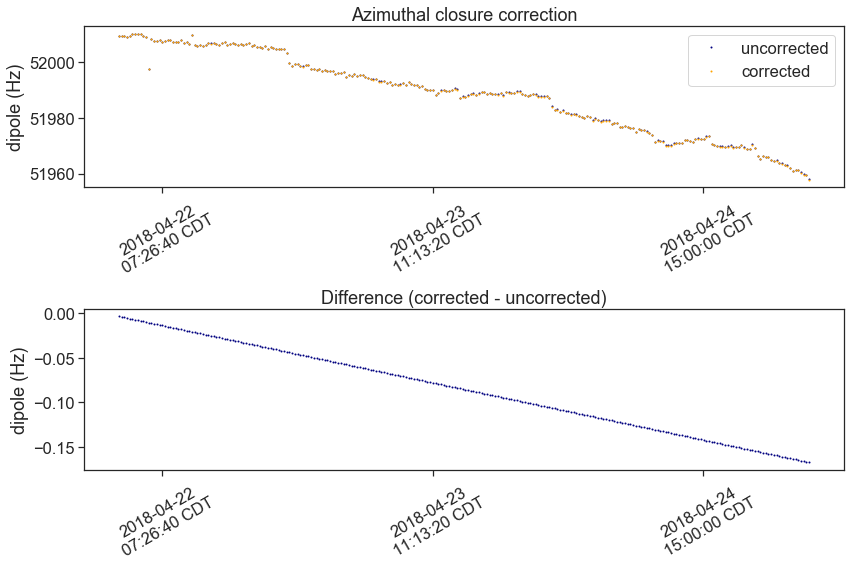

In [19]:
# Draw comparison plot of dipole

fig, axs = plt.subplots(2,1)
plt.sca(axs[0])

plt.plot(azi_avg_df.index.values, azi_avg_df['m1'], '.', color='navy', markersize=2, label='uncorrected')
plt.plot(azi_avg_df_2.index.values, azi_avg_df_2['m1'], '.', color='orange', markersize=2, label='corrected')
axs[0].legend()
plt2.plt_unix_time_to_CST(axs[0])
plt2.plt_set_labels(axs[0], '', 'dipole (Hz)', 'Azimuthal closure correction')

plt.sca(axs[1])
plt.plot(azi_avg_df.index.values, azi_avg_df_2['m1']-azi_avg_df['m1'], '.', color='navy', markersize=2)
plt2.plt_unix_time_to_CST(axs[1])
plt2.plt_set_labels(axs[1], '', 'dipole (Hz)', 'Difference (corrected - uncorrected)')

fig.set_size_inches(12,8)
fig.tight_layout()